In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
all_files = os.listdir("./Data/SpotifyData/Stream/")
stream_df = pd.DataFrame()
for file in all_files:
    temp_df = pd.read_json("./Data/SpotifyData/Stream/"+file)
    stream_df = pd.concat([stream_df, temp_df])

In [4]:
#This df contains data from 21-09-2020 onwards
stream_df.to_csv("combined_data.csv", index=False)
df = pd.read_csv("combined_data.csv")

In [5]:
#Finding the top 100 tracks played by me
top100 = df.groupby("artistName").sum("msPlayed").sort_values("msPlayed", ascending=False).head(100)


In [6]:
#Converting milliseconds to hours, days
top100['hoursPlayed'] = top100['msPlayed'] / 1000 / 60 / 60
top100['daysPlayed'] = top100['hoursPlayed'] / 24

In [7]:
top100.head(25)

,msPlayed,hoursPlayed,daysPlayed
artistName,,,
Opeth,758492717,210.692421,8.778851
Metallica,66604430,18.501231,0.770885
Porcupine Tree,65850069,18.291686,0.762154
Music Utility,56561984,15.711662,0.654653
The Ocean,51819487,14.394302,0.599763
Anekdoten,48077594,13.354887,0.556454
Gojira,44140944,12.261373,0.510891
Mastodon,37033410,10.287058,0.428627
My Morning Jacket,34215080,9.504189,0.396008


Looks like I listen to Opeth a lot more than everything else in my library from 2020-2021

In [8]:
df

,endTime,artistName,trackName,msPlayed
0,2020-09-21 16:13,Opeth,Face Of Melinda (Remastered),26247
1,2020-09-22 03:12,Jordan Robinson,Black Rapids,85997
2,2020-09-22 08:09,Haken,Affinity.exe,1496
3,2020-09-22 08:09,Soen,Martyrs,30869
4,2020-09-22 08:09,TOOL,The Grudge,76927
...,...,...,...,...
18625,2021-09-22 06:59,Anathema,One Last Goodbye - Remastered,323933
18626,2021-09-22 07:00,Soen,Martyrs,0
18627,2021-09-22 07:12,Empyrium,The Ensemble of Silence,595000
18628,2021-09-22 07:16,Blackfield,Glow - Remastered,243040


In [9]:
#Fixing same track name conflicts by creating a unique name for each track
df['TrackID'] = df['artistName'] + ':' + df['trackName']

In [16]:
df

,endTime,artistName,trackName,msPlayed,TrackID,endHour
0,2020-09-21 16:13,Opeth,Face Of Melinda (Remastered),26247,Opeth:Face Of Melinda (Remastered),16
1,2020-09-22 03:12,Jordan Robinson,Black Rapids,85997,Jordan Robinson:Black Rapids,03
2,2020-09-22 08:09,Haken,Affinity.exe,1496,Haken:Affinity.exe,08
3,2020-09-22 08:09,Soen,Martyrs,30869,Soen:Martyrs,08
4,2020-09-22 08:09,TOOL,The Grudge,76927,TOOL:The Grudge,08
...,...,...,...,...,...,...
18625,2021-09-22 06:59,Anathema,One Last Goodbye - Remastered,323933,Anathema:One Last Goodbye - Remastered,06
18626,2021-09-22 07:00,Soen,Martyrs,0,Soen:Martyrs,07
18627,2021-09-22 07:12,Empyrium,The Ensemble of Silence,595000,Empyrium:The Ensemble of Silence,07
18628,2021-09-22 07:16,Blackfield,Glow - Remastered,243040,Blackfield:Glow - Remastered,07


In [10]:
# artists = [artist for artist, df in top100.groupby('artistName').sort_values("msPlayed", ascending=False)]

In [11]:
x_axis = top100.index.values
y_axis = top100.head(25)['hoursPlayed']

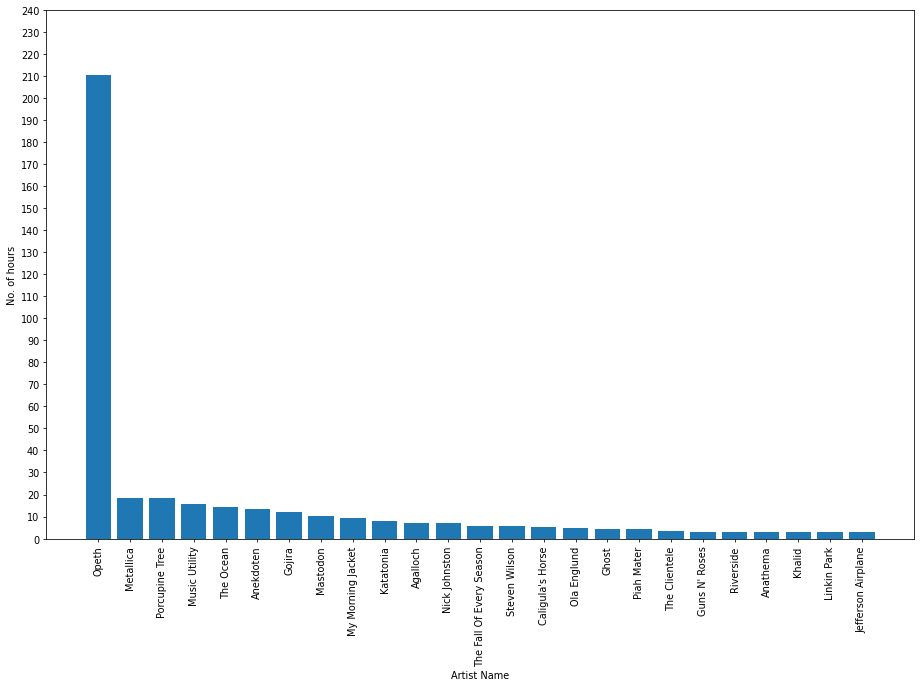

In [12]:
plt.figure(figsize=(16,10), dpi=70)
plt.bar(x_axis[0:25], y_axis)
plt.xlabel("Artist Name")
plt.ylabel("No. of hours")
plt.xticks(rotation="vertical")
plt.yticks(np.arange(0, 250, 10))
plt.savefig("Bar25")
plt.show()

In [25]:
#My top tracks
topTracks = df.groupby('TrackID').sum()
topTracks = topTracks.sort_values("msPlayed", ascending=False)
topTracks['hours'] = topTracks['msPlayed'] / 1000 / 60 / 60
topTracks.head(10)

,msPlayed,hours
TrackID,,
Opeth:Deliverance,26207360,7.279822
Opeth:Blackwater Park,24357464,6.765962
Opeth:Bleak,23839709,6.622141
Opeth:When,23648513,6.569031
Opeth:The Drapery Falls,23096588,6.415719
Opeth:Ghost of Perdition,22084808,6.134669
Opeth:The Leper Affinity,21771624,6.047673
Opeth:The Baying of the Hounds,21607844,6.002179
Opeth:Serenity Painted Death (Remastered),19165194,5.323665


Every track in the top 10 is an Opeth song!

#### Next task: See if time has any relationship with the artists or genre (Data looks like it's inaccurate but still worth a try). 

In [13]:
df.count()

endTime       18630
artistName    18630
trackName     18630
msPlayed      18630
TrackID       18630
dtype: int64

In [14]:
df['endHour'] = df['endTime'].str[-5:-3]

In [15]:
hour_df = df.groupby('endHour').count()[['endTime']]
hour_df = hour_df.rename(columns={'endTime' : 'Count'})
hour_df

,Count
endHour,
00,22
01,149
02,222
03,713
04,1118
05,1475
06,918
07,1386
08,1133
